**Imports**

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Para mejorar la visualización
from scipy.stats import zscore

**Carga y analisis**

In [186]:
# Cargar dataset
data = pd.read_csv("../Datasets/kc_house_data.csv")

# Seleccionar solo las columnas necesarias
data = data[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
print(len(data))
# Eliminar filas con NaN
data = data.dropna()
#Eliminar los que tengan un 0
#data = data[(data.T != 0).all()]

21613


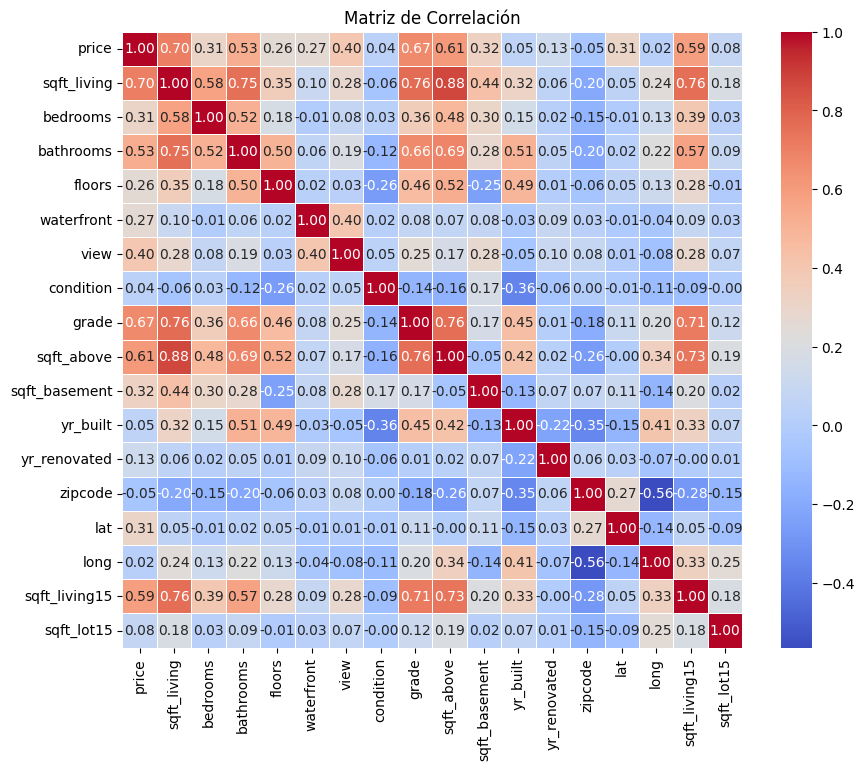

Nueva longitud de sqft_living_limpio: 21613
Nueva longitud de price_limpio: 21613
21613


In [187]:
# Matriz de correlación
corr = data.corr()

# Visualizar matriz de correlación mejorada
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Filtrar solo sqft_living y price para análisis posterior
data2 = data[['sqft_living', 'price']]
print(f"Nueva longitud de sqft_living_limpio: {len(data2)}")
print(f"Nueva longitud de price_limpio: {len(data2)}")
print(len(data2))


Se seleccionan unicamente las dos columnas a utilizar: sqft_living y price

In [188]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
# Filtrar solo sqft_living y price para análisis posterior
data2 = data[['sqft_living', 'price']]
#Pasar a int
data2['sqft_living'] = pd.to_numeric(data2['sqft_living'], errors='coerce')
data2['price'] = pd.to_numeric(data2['price'], errors='coerce')

# Alinear los índices de ambas columnas
common_index = data2['sqft_living'].index.intersection(data2['price'].index)

# Filtrar las columnas para que ambas tengan el mismo índice
sqft_living_limpio = data2['sqft_living'].loc[common_index]
price_limpio = data2['price'].loc[common_index]

print(len(data2))


21613


C:\Users\dekna\AppData\Local\Temp\ipykernel_26744\2388539784.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sqft_living'] = pd.to_numeric(data2['sqft_living'], errors='coerce')
C:\Users\dekna\AppData\Local\Temp\ipykernel_26744\2388539784.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['price'] = pd.to_numeric(data2['price'], errors='coerce')


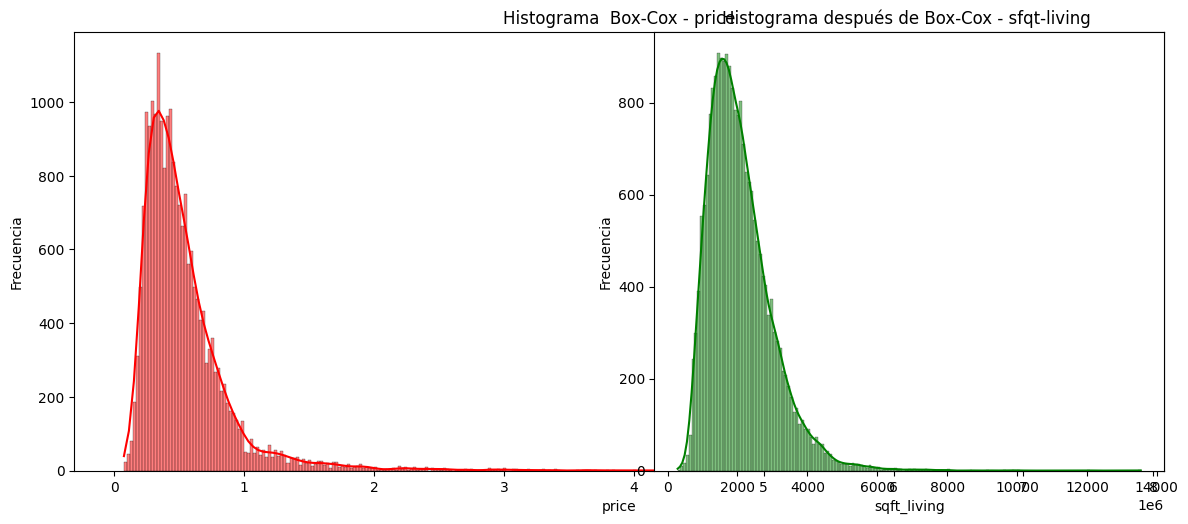

In [189]:
# Histograma antes de Box-Cox
plt.figure(figsize=(12,6))
sns.histplot(data2['price'], kde=True, color='red')
plt.title(f'Histograma  Box-Cox - price')

plt.ylabel('Frecuencia')
# Histograma después de Box-Cox
plt.subplot(1, 2, 2)
sns.histplot(data2['sqft_living'], kde=True, color='green')
plt.title(f'Histograma después de Box-Cox - sfqt-living ')

plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

**Normalización dde datos**

In [190]:
# Filtrar solo los datos positivos para aplicar Box-Cox y reemplazar en el DataFrame original
data2 = data2[data2['price'] > 0]
data2 = data2[data2['sqft_living'] > 0]

# Aplicar la transformación Box-Cox y reemplazar las columnas originales
data2['price'], lambda_price = boxcox(data2['price'])
data2['sqft_living'], lambda_sqft_living = boxcox(data2['sqft_living'])
print(len(data2))


21613


In [191]:
# Asegurar que solo se mantienen valores positivos en sqft_living y price
data2 = data2[(data2["sqft_living"] > 0) & (data2["price"] > 0)]

print("Primeros índices de sqft_living_limpio:", sqft_living_limpio.index[:5])
print("Primeros índices de price_limpio:", price_limpio.index[:5])


Primeros índices de sqft_living_limpio: Index([0, 1, 2, 3, 4], dtype='int64')
Primeros índices de price_limpio: Index([0, 1, 2, 3, 4], dtype='int64')


**Eliminacion de outliers**

In [192]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Función para eliminar outliers usando IQR
def eliminar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    return df[(df[col] >= limite_inf) & (df[col] <= limite_sup)]

"""# Función para eliminar outliers usando Z-score
def eliminar_outliers_zscore(df, col):
    z_scores = np.abs(zscore(df[col]))
    return df[z_scores < 3]"""

# Aplicar eliminación de outliers con IQR y Z-score a las columnas clave
columns_to_clean = ['price', 'sqft_living']
for col in columns_to_clean:
    data2 = eliminar_outliers_iqr(data2, col)
    """data = eliminar_outliers_zscore(data, col)"""

# Verificar que no haya ceros en los datos finales
print(f"Ceros en sqft_living_limpio: {(data2['sqft_living'] == 0).sum()}")
print(f"Ceros en price_limpio: {(data2['price'] == 0).sum()}")

# Mostrar las primeras filas del DataFrame limpio
print(data2.head())
print(len(data2))

Ceros en sqft_living_limpio: 0
Ceros en price_limpio: 0
   sqft_living     price
0     7.834031  4.033477
1     8.796260  4.078344
2     7.315299  4.021447
3     8.458887  4.083549
4     8.268110  4.075892
21295


**Calculo asimetria**

In [193]:
from scipy.stats import skew


asimetria_despues_sqft = skew(data2['price'], nan_policy='omit') if len(data2['price']) > 0 else float('nan')


asimetria_despues_price = skew(data2['sqft_living'], nan_policy='omit') if len(data2['sqft_living']) > 0 else float('nan')

# Mostrar resultados redondeados
print(f"Asimetría después de Box-Cox (sqft_living): {asimetria_despues_sqft:.2f}")
print(f"Asimetría después de Box-Cox (price): {asimetria_despues_price:.2f}")


Asimetría después de Box-Cox (sqft_living): 0.02
Asimetría después de Box-Cox (price): -0.04


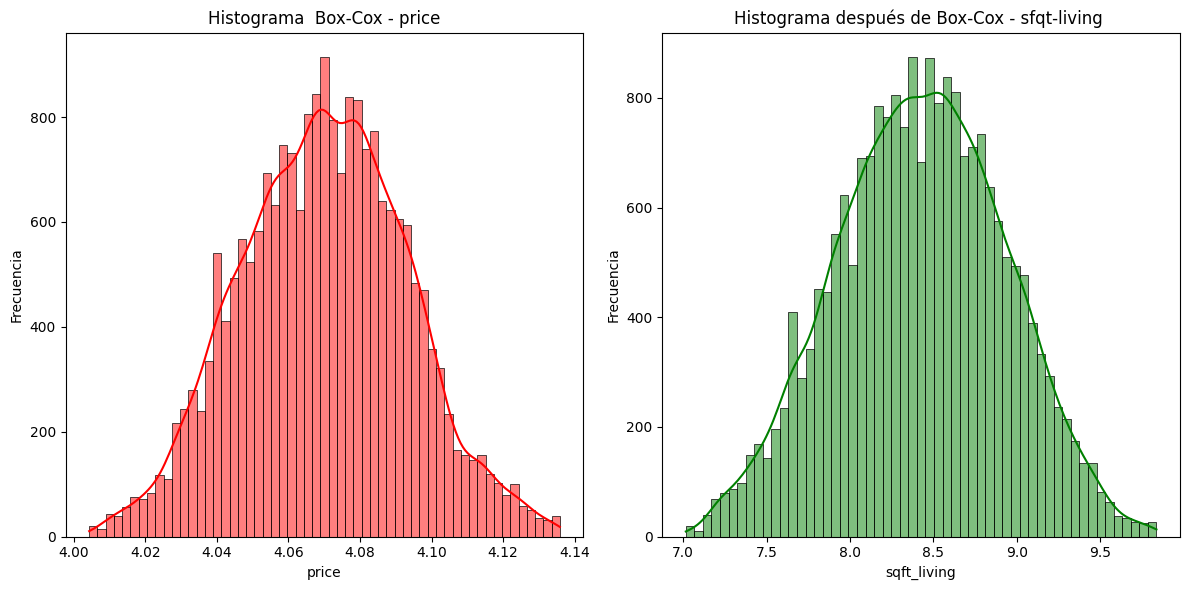

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Histograma antes de Box-Cox
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(data2['price'], kde=True, color='red')
plt.title(f'Histograma  Box-Cox - price')

plt.ylabel('Frecuencia')
# Histograma después de Box-Cox
plt.subplot(1, 2, 2)
sns.histplot(data2['sqft_living'], kde=True, color='green')
plt.title(f'Histograma después de Box-Cox - sfqt-living ')

plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()




Matriz de correlación:
             sqft_living     price
sqft_living     1.000000  0.645677
price           0.645677  1.000000


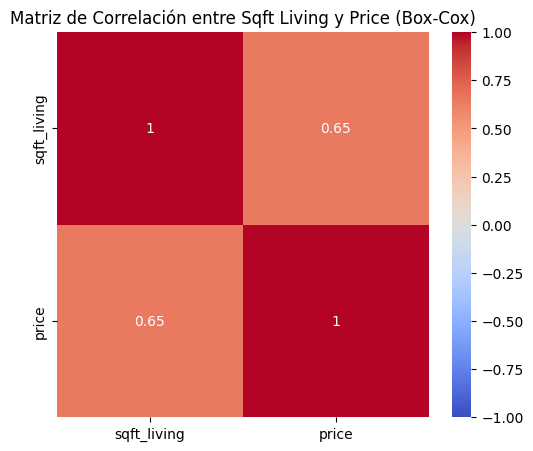

21295


In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las columnas transformadas
data2

# Calcular la matriz de correlación
correlation_matrix = data2.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Sqft Living y Price (Box-Cox)")
plt.show()
print(len(data2))


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Asegúrese de que 'sqft_living_boxcox' y 'price_boxcox' estén correctamente alineados
df_sin_outliers = pd.DataFrame({
    "Sqft_Living_BoxCox": data2['sqft_living'],
    "Price_BoxCox": data2['price']
})

# Verificar que no haya NaN
df_sin_outliers = df_sin_outliers.dropna(subset=['Sqft_Living_BoxCox', 'Price_BoxCox'])

# Definir X (features) y y (target)
X = df_sin_outliers["Sqft_Living_BoxCox"].values.reshape(-1, 1)  # Convertir a una matriz columna
y = df_sin_outliers["Price_BoxCox"].values

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test, y_test): {X_test.shape}, {y_test.shape}")


# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento (X_train, y_train)
modelo.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba (X_test)
y_pred = modelo.predict(X_test)

# Mostrar algunas de las predicciones
print(f"Predicciones: {y_pred[:10]}")  # Muestra las primeras 10 predicciones

# Evaluar el modelo con métricas
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación (R²)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Tamaño del conjunto de entrenamiento (X_train, y_train): (17036, 1), (17036,)
Tamaño del conjunto de prueba (X_test, y_test): (4259, 1), (4259,)
Predicciones: [4.08768171 4.07876953 4.07521377 4.0551569  4.05185208 4.07203612
 4.08355166 4.0784596  4.07487349 4.07034205]
Error cuadrático medio (MSE): 0.00
Coeficiente de determinación (R²): 0.40


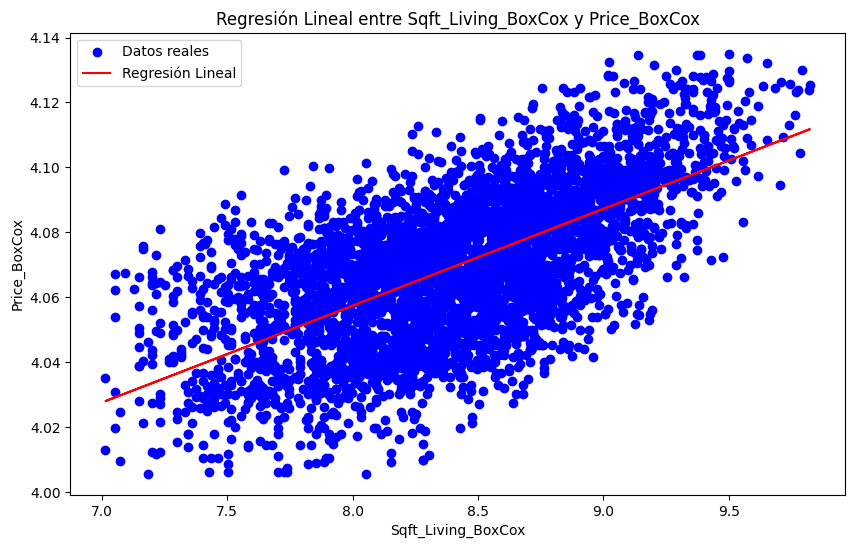

In [198]:
import matplotlib.pyplot as plt

# Graficar los resultados
plt.figure(figsize=(10,6))

# Crear gráfico de dispersión de los datos reales
plt.scatter(X_test, y_test, color="blue", label="Datos reales")

# Graficar la línea de regresión utilizando las predicciones del modelo
plt.plot(X_test, y_pred, color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Sqft_Living_BoxCox")
plt.ylabel("Price_BoxCox")
plt.title("Regresión Lineal entre Sqft_Living_BoxCox y Price_BoxCox")
plt.legend()

# Mostrar el gráfico
plt.show()
